# Bhagwan Bansal
## 101903015
## 4CO1
## Assignment 1

### Libraries Import

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.ensemble import RandomForestRegressor

### Dataset Import 

In [3]:
dataset = pd.read_excel("D:/assign 1/RoadDataset-TimeSeriesPrediction-main/DATASET.xlsx",engine='openpyxl')

c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [4]:
dataset

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Sec_1,1.0,324.0,354.5,17.0,0.0,3.0,117.0,2600.0,400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2.0,324.0,161.1,18.2,0.0,4.0,106.0,5950.0,1190.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3.0,324.0,170.7,18.5,0.0,4.0,110.0,5950.0,1190.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4.0,324.0,223.9,18.9,0.0,3.0,110.0,6150.0,1340.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5.0,324.0,228.2,18.4,0.0,2.0,113.0,6340.0,1450.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,NaN,7.0,454.0,703.0,14.5,17.0,13.0,118.0,4150.0,830.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,NaN,8.0,454.0,1124.1,14.9,45.0,18.0,117.0,4200.0,840.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,NaN,9.0,454.0,1462.3,13.2,62.0,27.0,117.0,4400.0,720.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009,NaN,10.0,454.0,986.3,14.3,67.0,24.0,122.0,4415.0,721.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
j = 0
for i in range(100):
    dataset.iloc[j:j + 10, 0] = dataset.iloc[j, 0]
    j += 10

### Data Preprocessing

In [6]:

dataset.columns = dataset.columns.str.replace('Unnamed: 0', 'Group')

In [7]:
#Replacing empty cells with zero
dataset.fillna(0, inplace=True)

In [8]:
#Test Dataset
test_dataset = dataset.loc[dataset['year'] == 10]
test_dataset

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
9,Sec_1,10.0,324.0,53.6,19.0,0.0,2.0,105.0,7567.0,1885.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,Sec_2,10.0,327.7,62.0,22.7,0.0,2.0,102.0,30525.0,10234.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,Sec_3,10.0,487.7,93.2,22.5,0.0,4.0,110.0,2140.0,1270.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,Sec_4,10.0,543.6,93.2,22.5,0.0,4.0,110.0,2140.0,1270.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,Sec_5,10.0,434.4,149.0,11.7,72.0,3.0,110.0,13142.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,Sec_97,10.0,514.0,1226.4,10.1,203.6,16.0,114.0,7672.0,303.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
979,Sec_98,10.0,901.0,1531.0,11.1,34.9,40.0,100.0,15150.0,1077.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
989,Sec_99,10.0,1181.0,1364.9,9.2,274.3,24.0,112.0,12500.0,880.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999,Sec_100,10.0,662.0,1110.7,12.8,33.2,27.0,117.0,3324.0,1356.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
test_dataset.columns = test_dataset.columns.str.replace('Unnamed: 0', 'Group')

In [10]:
dataset.head(12)

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Sec_1,1.0,324.0,354.5,17.0,0.0,3.0,117.0,2600.0,400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Sec_1,2.0,324.0,161.1,18.2,0.0,4.0,106.0,5950.0,1190.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Sec_1,3.0,324.0,170.7,18.5,0.0,4.0,110.0,5950.0,1190.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sec_1,4.0,324.0,223.9,18.9,0.0,3.0,110.0,6150.0,1340.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sec_1,5.0,324.0,228.2,18.4,0.0,2.0,113.0,6340.0,1450.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Sec_1,6.0,324.0,225.0,17.2,0.0,4.0,114.0,6630.0,1500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Sec_1,7.0,324.0,130.0,18.4,0.0,3.0,103.0,6700.0,1540.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Sec_1,8.0,324.0,100.6,19.0,0.0,2.0,114.0,6740.0,1590.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Sec_1,9.0,324.0,176.5,19.0,0.0,3.0,108.0,7175.0,1787.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Sec_1,10.0,324.0,53.6,19.0,0.0,2.0,105.0,7567.0,1885.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Definition 

In [11]:
etr = ExtraTreesRegressor(n_estimators=200,bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=1000,
                    min_impurity_decrease=0.0, 
                    min_samples_leaf=1,
                    min_weight_fraction_leaf=0.1,
                    n_jobs=None, oob_score=False, random_state=123, verbose=0,
                    warm_start=False)

In [12]:
col_names = ['Parameter-9', 'Parameter-10', 'Parameter-11', 'Parameter-12', 'Parameter-13']

In [13]:
result = {'Parameter-9': [], 'Parameter-10': [], 'Parameter-11': [], 'Parameter-12': [], 'Parameter-13': []}

In [14]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

## Model Application

In [15]:
def Model(val):
    RMSE = []
    N = 0
    index = 0
    if(val==0):
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                xtrain = dataset.iloc[i:i+9, 1:10]
                ytrain = dataset.iloc[i:i+9, j]
                xtest = dataset.iloc[i+9, 1:10].to_numpy()
                ytest = dataset.iloc[i+9, j]

                etr.fit(xtrain, ytrain)

                ypred = etr.predict(xtest.reshape(1,-1))[0]

                result[col_names[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1
            
    #For Applying Random Forest    
    else:
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                xtrain = dataset.iloc[i:i+9, 1:10]
                ytrain = dataset.iloc[i:i+9, j]
                xtest = dataset.iloc[i+9, 1:10].to_numpy()
                ytest = dataset.iloc[i+9, j]

                rf.fit(xtrain, ytrain)

                ypred = rf.predict(xtest.reshape(1,-1))[0]

                result[col_names[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1
    return (RMSE, count)

In [16]:
result_RMSE, result_count = Model(1)

In [17]:
dataset_predicted = pd.DataFrame.from_dict(result)
dataset_predicted

,Parameter-9,Parameter-10,Parameter-11,Parameter-12,Parameter-13
0,2.5015,53.0868,37.335,7.579,1.892430
1,56.0135,27.8117,0.885,7.610,0.788332
2,64.2127,0.0000,0.000,11.257,1.361942
3,15.9736,53.1660,57.167,6.998,1.797542
4,0.0000,247.1847,33.835,5.890,1.678023
...,...,...,...,...,...
95,0.0000,109.9675,14.688,3.664,1.353677
96,163.9678,176.6288,8.830,7.289,1.503908
97,4.0836,57.8961,21.501,11.673,1.064197
98,96.5461,55.9914,12.140,10.738,0.889464


## RMSE Calculations

In [18]:
print((sum(result_RMSE)/500)**0.5)

45.52652598911236


## Result Plots 

In [19]:
#Selecting random 30 rows
import random
ind = []
for i in range(30):
    ind.append(random.randint(0,100))

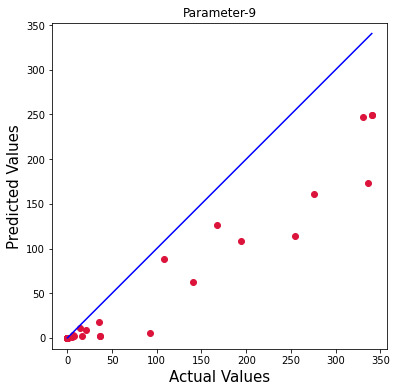

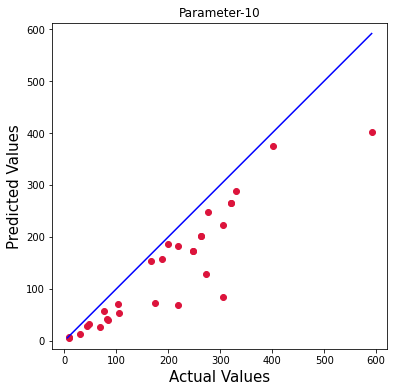

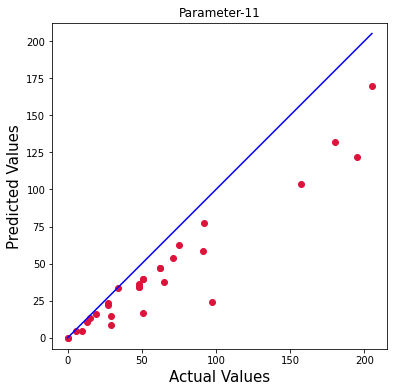

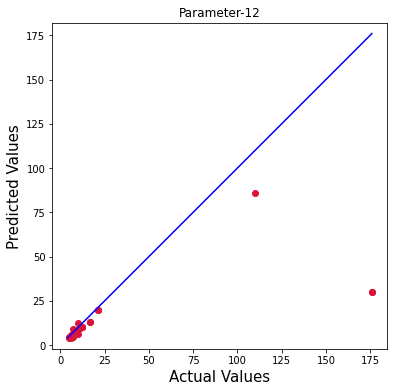

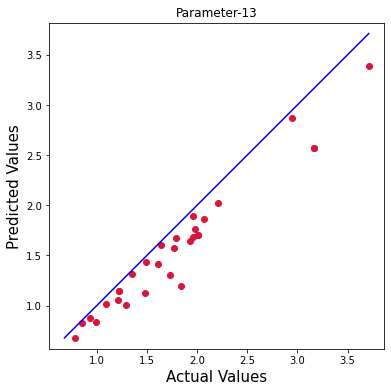

In [20]:
#Scatter plot for random 30 rows out of 100 for each target column
for i in range(5):
    plt.figure(figsize=(6,6))
    true_value = test_dataset.iloc[ind, i+10]
    predicted_value = dataset_predicted.iloc[ind, i]
    plt.scatter(true_value, predicted_value, c='crimson')
  
    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.title(col_names[i])
    plt.xlabel('Actual Values', fontsize=15)
    plt.ylabel('Predicted Values', fontsize=15)
    plt.axis('equal')
    plt.show()